## Hi there!  
### The challenge is to spot 12 diffrences between two Rick and Morty images.  
### I present two ways - one simple and second more advanced.

In [2]:
# Import libraries
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
from IPython.display import display
import cv2
import imutils
import numpy as np

Original photo:

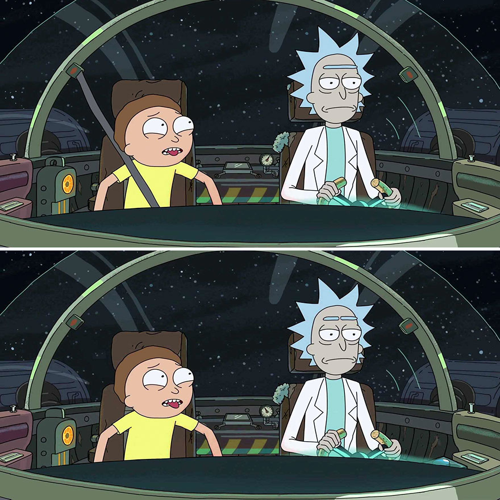

In [3]:
# Read original image
original_image = cv2.imread('Original_image.jpg')

# Convert the image from OpenCV format (BGR) to Pillow format (RGB)
pil_image = Image.fromarray(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

 # Resize the image to a smaller size
small_image = pil_image.resize((500, 500))

# Display the image
display(small_image)

### Simple solution

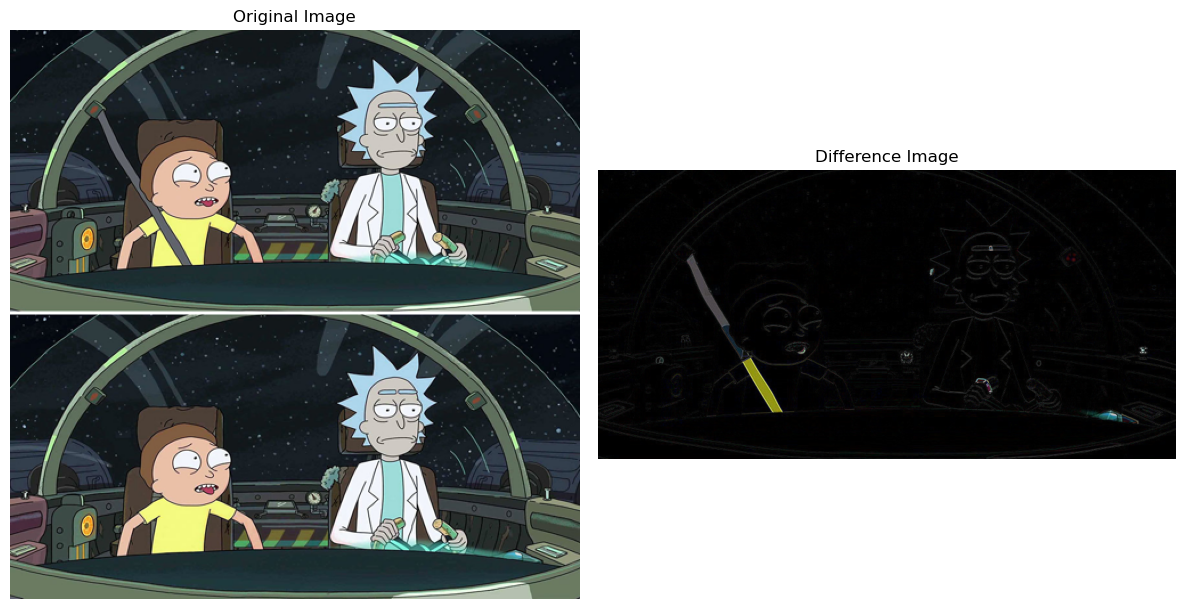

In [4]:
# Open comparison images
image1, image2 = Image.open('Image1.jpg'), Image.open('Image2.jpg')

# Find the diffrence
difference = ImageChops.difference(image1, image2)
difference = difference.resize((800,400))

# Check if there is any difference
if difference.getbbox():
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original image
    axs[0].imshow(small_image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Plot the resized difference image
    axs[1].imshow(difference)
    axs[1].set_title('Difference Image')
    axs[1].axis('off')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("There is no diffrence beetween those images")

### Advanced solution

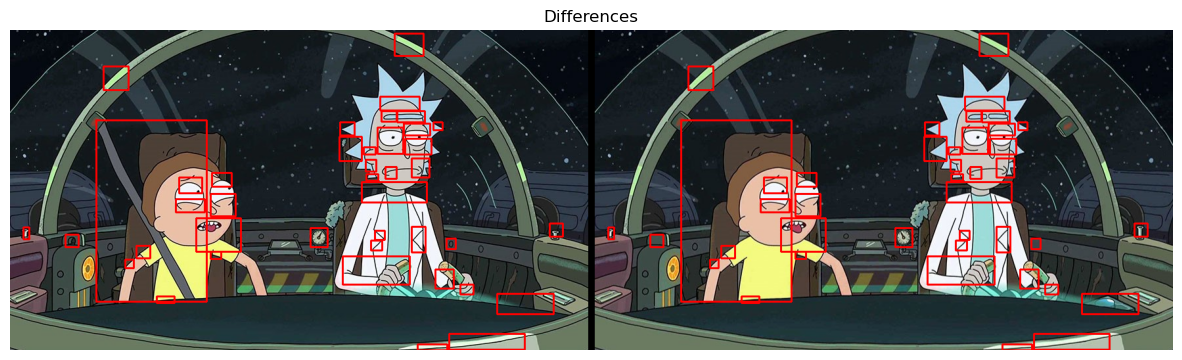

In [35]:
# Open comparison images
image1, image2 = cv2.imread('Image1.jpg'), cv2.imread('Image2.jpg')

# Resize images to have the same height
target_height = min(image1.shape[0], image2.shape[0])

# Calculate new width while maintaining aspect ratio
width1 = int((target_height / image1.shape[0]) * image1.shape[1])
width2 = int((target_height / image2.shape[0]) * image2.shape[1])

# Apply Grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Find the diffrence using absdiff
difference = cv2.absdiff(gray_image1, gray_image2)
#cv2.imshow("Diffrence(gray_image1, gray_image2)", difference)

# Apply Treshold
thresh = cv2.threshold(difference, , 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#cv2.imshow("Threshold", thresh)

# Add Dilation
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations = 2)
#cv2.imshow("Dilation", dilation)

# Find contours
contours = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

# Loop over each contour
for contour in contours:
    if cv2.contourArea(contour) > 100:
        # Calculate box:
        x, y, w, h = cv2.boundingRect(contour)
        # Draw bounding box
        cv2.rectangle(image1, (x, y), (x+w, y+h), (0,0,255), 2 )
        cv2.rectangle(image2, (x, y), (x+w, y+h), (0,0,255), 2 )

# Show result
x = np.zeros((487,10,3), np.uint8)
result = np.hstack((image1, x, image2))

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Differences')
plt.axis('off')
plt.show()